<img src='https://drive.google.com/uc?export=view&id=1-PExlpxdip_2t7wN9Ru8Sn_jTTxj3MlA' width=100px>

<h1>Applied Text Mining and Sentiment Analysis with Python</h1>

Welcome! 

If you're ready. Let's go!




<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 1` Dataset Overview


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Load and analyze Dataset

Very useful packages for Data Analysis. Don't hesitate to visit any of those sites in case you don't get what we are doing.
*   `Pandas`: https://pandas.pydata.org/docs/
*   `Numpy`: https://numpy.org/doc/





In [613]:
import pandas as pd
import numpy as np

* Read Dataframe stored in data folder under `.csv` format

In [614]:
dataframe1 = pd.read_csv("depress_text.csv", index_col=0)
dataframe2 = pd.read_csv("non_depress_text.csv", index_col=0)

In [615]:
len(dataframe1)

921

In [616]:
len(dataframe2)

618

* Use the `sample` method to look at some random tweets present in our dataset

In [617]:
import pandas as pd

# Merge two dataframes
df = pd.concat([dataframe1, dataframe2])

# Reset the index of the DataFrame
df = df.reset_index()

df.sample(20)

,Text,Sentiment
1208,I had fun this summer,0
552,I'm suffocating in this sea of loneliness.,1
329,The world feels gray and lifeless. It's a stru...,1
768,"""Depression has affected my self-esteem and ma...",1
1378,"4 novos followers http://migre.me/SfN Sorry, t...",0
1001,"yay sing it loud wed, fall out boy, all time l...",0
169,Feeling a sense of isolation or disconnection ...,1
264,My self-worth has been crushed by this relentl...,1
458,The workload feels overwhelming. It's a never-...,1
519,Feeling a sense of disorientation or confusion...,1


* Check how many tweets there are in total

In [618]:
print("Number of text: {}".format(len(df)))
df.info()

Number of text: 1539
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       1539 non-null   object
 1   Sentiment  1539 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.2+ KB


* Print a tweet and its sentiment based on a tweet ID

In [619]:
text_id = 445
text = df.iloc[text_id]
print("Text: {}".format(text["Text"]))
print("Text sentiment: {}".format(text["Sentiment"]))

Text: The fear of burdening my friends with my struggles, leading to social withdrawal and isolation. #FriendshipBurden
Text sentiment: 1


<img src='virtual-lab.gif' width=250px>

## **1.3** Dataset 
**1.3.1** Matplotlib</h4>

* Import the `pyplot` module from the matplotlib package 

In [620]:
import matplotlib.pyplot as plt

In [621]:
print("Number of Depression text: {}".format(df[df["Sentiment"]==1].count()[0]))
print("Number of Non Depression text: {}".format(df[df["Sentiment"]==0].count()[0]))


Number of Depression text: 921
Number of Non Depression text: 618


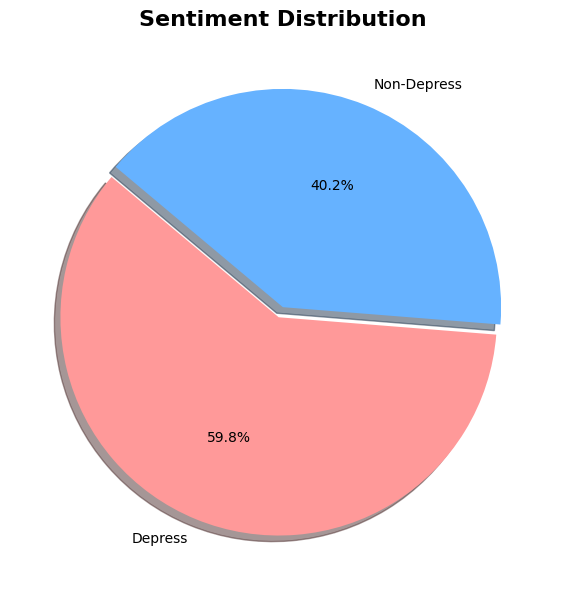

In [622]:
# Calculate sentiment counts
sentiment_count = df["Sentiment"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size

# Define colors for the pie chart
colors = ['#FF9999', '#66B2FF']

# Create the pie chart with custom colors and explode a slice
plt.pie(sentiment_count, labels=["Depress", "Non-Depress"],
        colors=colors, autopct='%1.1f%%', startangle=140,
        shadow=True, explode=(0.05, 0))

# Set the title and adjust the layout
plt.title("Sentiment Distribution", fontsize=16, fontweight="bold")
plt.tight_layout()

# Display the chart
plt.show()

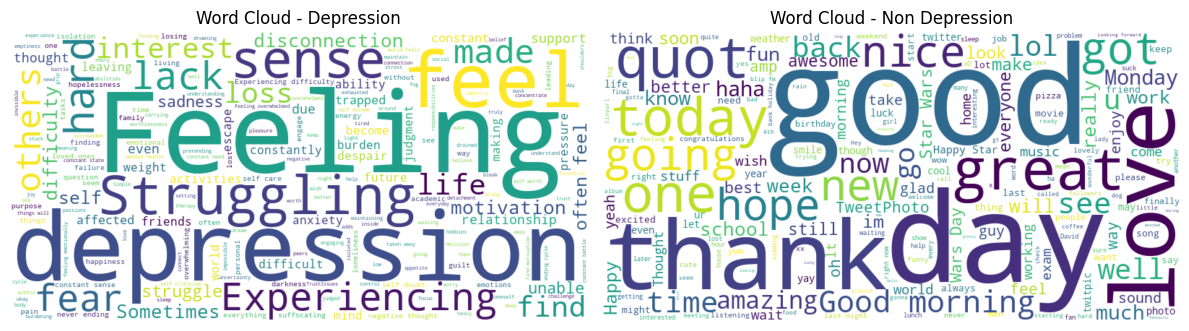

In [623]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the post text based on label
label_1_text = ' '.join(df[df['Sentiment'] == 1]['Text'])
label_0_text = ' '.join(df[df['Sentiment'] == 0]['Text'])

# Create WordCloud objects for each label
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(label_1_text)
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(label_0_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(wordcloud_1, interpolation='bilinear')
axes[0].set_title('Word Cloud - Depression')
axes[0].axis('off')

axes[1].imshow(wordcloud_0, interpolation='bilinear')
axes[1].set_title('Word Cloud - Non Depression')
axes[1].axis('off')

# Display the word clouds
plt.tight_layout()
plt.show()


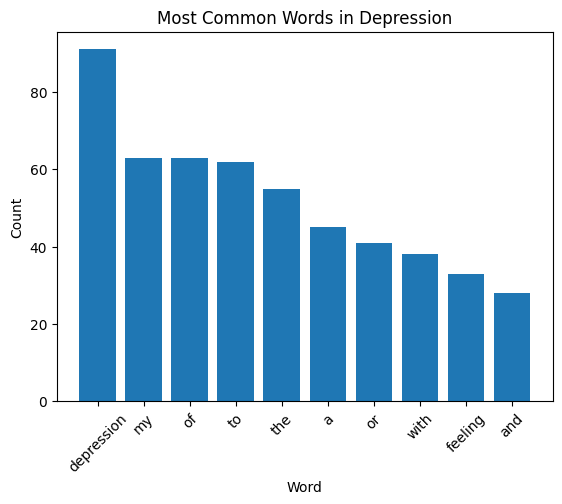

In [624]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Filter the dataframe to include rows containing the word "depression"
filtered_df = df[df['Text'].str.contains('depression')]

# Preprocess the text data and count word frequencies
word_counts = Counter()
for text in filtered_df['Text']:
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize the words
    words = text.split()
    # Update word frequencies
    word_counts.update(words)

# Select the top N most common words
top_n = 10  # Change this value to show more or fewer words
common_words = word_counts.most_common(top_n)
words, counts = zip(*common_words)

# Create the bar chart
plt.bar(words, counts)

# Add labels and title
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words in Depression')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `SECTION 2` Text Normalization

As this section relies quite a lot on `REGEX`, you might want to have a look at the following website: https://regexr.com/

* Import `regex` package

In [625]:
import re

In [626]:
import pandas as pd

# Load the NRC Emotion Lexicon
lexicon_df = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", sep='\t', header=None, names=["word", "emotion", "value"])

# Filter the lexicon for depression-related words
depression_lexicon = lexicon_df[(lexicon_df["emotion"] == "sadness") & (lexicon_df["value"] == 1)]["word"].tolist()

# Function to check if depression lexicon words are present in the text
def check_depression_lexicon(text):
    for word in depression_lexicon:
        if re.search(r'\b' + re.escape(word) + r'\b', text):
            return True
    return False

# Example usage
text = "I am very good today."
has_depression_lexicon = check_depression_lexicon(text)

if has_depression_lexicon:
    print("The text contains depression-related words.")
else:
    print("The text does not contain depression-related words.")


The text does not contain depression-related words.


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.1** Twitter features

* Example of a *random* tweet that can be found on Twitter

In [627]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** RT Tag

#### Need a hint?

* `R` : match "R" character
* `T` : match "T" character
* `\s` : match any whitespace character
* `+` : match one or more of the preceding tokens

#### Handle the RT Tag

* Replace occurences of `RT` with a default value

In [628]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [629]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.2** @User Tag

#### Need a hint?




* `\B` : match any position that is not a word boundary
* `@` : match "@" character
* `\w` : match any word character 
* `+` : match one or more of the preceding tokens

#### Handle the User Tag

* Replace `@_Someone_` with a default user tag

In [630]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [631]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.3** Emojis

* Install the `emoji` package

* Import the installed package

In [632]:
import emoji

* Replace emojis with a meaningful text

In [633]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [634]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.4** URL

#### Need a hint?

* `(http|https)` : capturing group matching either http or https
* `:` : match the ":" character
* `\/` : match the "/" charachter
* `\S` : match any character that is not whitespace
* `+` : match one or more of the preceding tokens

#### Handle the URL

* Replace occurences of `http://` or `https://` with a default value

In [635]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [636]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.5** Hashtags

* Replace occurences of `#_something_` with a default value

In [637]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [638]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.2** Word Features

Let's now have a look at some other features that are not really Twitter-dependant

In [639]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.1** Remove upper capitalization

* Lower case each letter in a specific tweet

In [640]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [641]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.2** Word repetition

* Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [642]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [643]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.3** Punctuation repetition

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [644]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [645]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.4** Word contraction

* Install the `contractions` package

* Import the installed package

In [646]:
import contractions

* Use `contractions_dict` to list most common contractions

In [647]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionnary

In [648]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [649]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions package

In [650]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [651]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.3** Tokenization

More information about NLTK? Head over to: https://www.nltk.org

* Install the `NLTK` package

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.1** Easy Tokenization

* Import `NLTK`
* Import the `word_tokenize` module from NLTK 
* Download the `Punkt` tokenizer model from NLTK

In [652]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Simple tweet to be tokenized

In [653]:
tweet = "These are 5 different words!"

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [654]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

* Use the `tokenize()` function to print the tokenized version of a tweet

In [655]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


That's it for the easy method! You will now see there is more you can do about it.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.2** Custom Tokenization

* Import the `string` package 

In [656]:
import string

* Retrieve english punctuation signs by using the `string` package

In [657]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Import the `stopwords` module from NLTK
* Download `stopwords` data from NLTK

In [658]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* Create a set of english stopwords

In [659]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'whom', 'nor', 're', 'doesn', "isn't", 'same', 'it', 'if', "won't", 'further', 'a', 'now', 'of', 'very', 'having', 'each', 'needn', 'he', 'no', 'couldn', 'did', 'but', 'an', 'don', 'll', 'because', 'that', 'weren', 'until', 'most', 'd', 'hers', 'or', 'above', 'y', 'wasn', "hadn't", 'own', 'into', 'shouldn', 'ourselves', "shouldn't", 'about', 'we', 'yourself', 'o', "wasn't", "needn't", 'while', 'them', 'myself', 'to', 'during', 'out', 'where', 'than', 'not', 'am', 'off', "mightn't", 'against', "should've", "haven't", 'can', 'were', 'some', 'doing', 'so', 'the', 'm', 'haven', 'him', 'over', 'such', "don't", "couldn't", 'has', 'mustn', "didn't", 'those', 'here', 'is', "aren't", 'for', 'will', 'have', 'once', "wouldn't", 'with', 'few', 've', 'which', 'yourselves', 'through', 'other', "you're", 'just', 'there', 'more', 'ma', 'at', 'on', 'and', 'between', 'as', "she's", 'under', 'does', 'they', "you've", 'what', 'theirs', "doesn't", 'wouldn', 'our', 'all', 'been', 'are', "weren't", 'my', 's

* Remove some stopwords from the set

In [660]:
stop_words.discard('not')
print(stop_words)

{'whom', 'nor', 're', 'doesn', "isn't", 'same', 'it', 'if', "won't", 'further', 'a', 'now', 'of', 'very', 'having', 'each', 'needn', 'he', 'no', 'couldn', 'did', 'but', 'an', 'don', 'll', 'because', 'that', 'weren', 'until', 'most', 'd', 'hers', 'or', 'above', 'y', 'wasn', "hadn't", 'own', 'into', 'shouldn', 'ourselves', "shouldn't", 'about', 'we', 'yourself', 'o', "wasn't", "needn't", 'while', 'them', 'myself', 'to', 'during', 'out', 'where', 'than', 'am', 'off', "mightn't", 'against', "should've", "haven't", 'can', 'were', 'some', 'doing', 'so', 'the', 'm', 'haven', 'him', 'over', 'such', "don't", "couldn't", 'has', 'mustn', "didn't", 'those', 'here', 'is', "aren't", 'for', 'will', 'have', 'once', "wouldn't", 'with', 'few', 've', 'which', 'yourselves', 'through', 'other', "you're", 'just', 'there', 'more', 'ma', 'at', 'on', 'and', 'between', 'as', "she's", 'under', 'does', 'they', "you've", 'what', 'theirs', "doesn't", 'wouldn', 'our', 'all', 'been', 'are', "weren't", 'my', 'shan', '

* Create a `custom_tokenize` function

In [661]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    # stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

* Test the function with a particular tweet

In [662]:
tweet = "these are 5 different words!"

In [663]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.4** Stemming

More information about `NLTK.stem`? Head over to: https://www.nltk.org/api/nltk.stem.html

* Import different libraries and modules used for stemming

In [664]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* List of tokens to stem (remember that we stem tokens and not entire sentences)

In [665]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined by directly using NLTK

In [666]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

* Create a `stem_tokens` function that takes the list of tokens as input and returns a list of stemmed tokens

In [667]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* Print the different results and compare the stemmed tokens

In [668]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [669]:
tokens = ["international", "companies", "had", "interns"]

In [670]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.5** Lemmatization

More information about WordNet? Head over to https://wordnet.princeton.edu/

* Import different libraries and modules used for lemmatization

In [671]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [672]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [673]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

* Create the lemmatizer by using the `WordNet` module

In [674]:
lemmatizer = WordNetLemmatizer()

* Create a `lemmatize_tokens` function that takes the list of tokens as input and returns a list of lemmatized tokens

In [675]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [676]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.6** Putting it all together

* Long and complex tweet to be processed

In [677]:
complex_tweet = r"""RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

* Create a custom `process_tweet` function that can be used to process tweets end-to-end
* **Note**: this function will be used as a base for the following sections, so be careful!

In [678]:
def process_tweet(tweet, verbose=False):
    if verbose: print("Initial tweet: {}".format(tweet))

    ## Twitter Features
    tweet = replace_retweet(tweet) # replace retweet
    tweet = replace_user(tweet, "") # replace user tag
    tweet = replace_url(tweet) # replace url
    tweet = replace_hashtag(tweet) # replace hashtag
    if verbose: print("Post Twitter processing tweet: {}".format(tweet))

    ## Word Features
    tweet = to_lowercase(tweet) # lower case
    tweet = fix_contractions(tweet) # replace contractions
    tweet = punct_repetition(tweet) # replace punctuation repetition
    tweet = word_repetition(tweet) # replace word repetition
    tweet = demojize(tweet) # replace emojis
    if verbose: print("Post Word processing tweet: {}".format(tweet))

    ## Tokenization & Stemming
    tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
    stemmer = SnowballStemmer("english") # define stemmer
    stem = stem_tokens(tokens, stemmer) # stem tokens

    processed_tweet = " ".join(stem)  # Join stemmed tokens back into a single string

    return processed_tweet


* Test your `process_tweet` function!

In [679]:
print(process_tweet(complex_tweet, verbose=False))

look big complex tweet would glad could normal check let know nlp fun


* Look at some more examples! 
* **Note:** it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written) 

In [680]:
import random
df["Text"]

0       Struggling with perfectionism, constantly stri...
1       Struggling with unresolved family conflicts or...
2       Struggling with a sense of disconnection or de...
3       The guilt of relying on family or friends for ...
4       Experiencing a loss of interest in personal go...
                              ...                        
1534                     @patgarrat657961 Thanks for that
1535    What a nice young guy at dunkin donuts let me ...
1536    @rebecca_leigh Thank you,!  Just trying to sta...
1537    back from school  daily show was amazing  gonn...
1538    @AlyceMadden why arent u famous already? lol y...
Name: Text, Length: 1539, dtype: object

In [681]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["Text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: Thanks for the follow, Doug. I like that hat
Post Twitter processing tweet: Thanks for the follow, Doug. I like that hat
Post Word processing tweet: thanks for the follow, doug. i like that hat
thank follow doug like hat


Initial tweet: The weight of the world bears down on my shoulders, a burden I cannot shake off. The future appears bleak and uncertain, devoid of any glimmer of hope. It's a constant battle to find a reason to keep going, to find a sliver of light in the suffocating darkness.
Post Twitter processing tweet: The weight of the world bears down on my shoulders, a burden I cannot shake off. The future appears bleak and uncertain, devoid of any glimmer of hope. It's a constant battle to find a reason to keep going, to find a sliver of light in the suffocating darkness.
Post Word processing tweet: the weight of the world bears down on my shoulders, a burden i cannot shake off. the future appears bleak and uncertain, devoid of any glimmer of hope. it is a cons

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 3` Text Representation </h2>

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.1** Positive/Negative Frequency

* Import the necessary packages

In [682]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


* Corpus of tweet tokens used for the first method

In [683]:
# Perform data cleaning
df["Text"] = df["Text"].apply(process_tweet)

# Split the dataset into training and testing sets
X = df["Text"]
y = df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [684]:
# Vectorize the data using negative/positive frequency
neg_pos_vectorizer = CountVectorizer(binary=True)
X_train_neg_pos = neg_pos_vectorizer.fit_transform(X_train)
X_test_neg_pos = neg_pos_vectorizer.transform(X_test)

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.2** Bag of Word

* Corpus of tweet tokens used for the second method

In [685]:
# Vectorize the data using bag-of-words
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.3** Term Frequency – Inverse Document Frequency (TF-IDF)

* Corpus of tweet tokens used for the third method

In [686]:
# Vectorize the data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 4` Sentiment Model

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.1** Logistic Regression

* Create a linear regression model and train it using the negative/positive frequency vectors

In [687]:
regression_model_neg_pos = LinearRegression()
regression_model_neg_pos.fit(X_train_neg_pos, y_train)
y_pred_neg_pos = regression_model_neg_pos.predict(X_test_neg_pos)
accuracy_neg_pos = accuracy_score(y_test, y_pred_neg_pos.round())

In [688]:
# Create a linear regression model and train it using the bag-of-words vectors
regression_model_bow = LinearRegression()
regression_model_bow.fit(X_train_bow, y_train)
y_pred_bow = regression_model_bow.predict(X_test_bow)
accuracy_bow = accuracy_score(y_test, y_pred_bow.round())

In [689]:
# Set the threshold for classifying as depressive
depression_threshold = 0.2

# Create a linear regression model and train it using the TF-IDF vectors
regression_model_tfidf = LinearRegression()
regression_model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = regression_model_tfidf.predict(X_test_tfidf)

# Classify sentiment based on the depression threshold
y_pred_tfidf_depression = [1 if score >= depression_threshold else 0 for score in y_pred_tfidf]

# Calculate accuracy
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf_depression)


In [690]:
# Print the accuracies
print("Accuracy using negative/positive frequency vectors:", accuracy_neg_pos)
print("Accuracy using bag-of-words vectors:", accuracy_bow)
print("Accuracy using TF-IDF vectors:", accuracy_tfidf)

Accuracy using negative/positive frequency vectors: 0.6331168831168831
Accuracy using bag-of-words vectors: 0.6136363636363636
Accuracy using TF-IDF vectors: 0.8571428571428571


In [691]:
# Text to be tested
text = '''I am felt very lost today. This work give me a lot of anxiety.'''

# Vectorize the text using the chosen vectorization technique (e.g., TF-IDF)
text_vectorized = tfidf_vectorizer.transform([text])

# Predict the sentiment using the chosen regression model (e.g., Linear Regression)
sentiment_pred = regression_model_tfidf.predict(text_vectorized)

# Round the predicted sentiment to 0 or 1
sentiment_pred_rounded = round(sentiment_pred[0])

# Determine the depression label
depression_label = "Depressive" if sentiment_pred_rounded == 1 else "Not Depressive"

# Print the result
print("Text:", text)
print("Predicted Sentiment:", sentiment_pred_rounded)
print("Depression Label:", depression_label)

Text: I am felt very lost today. This work give me a lot of anxiety.
Predicted Sentiment: 0
Depression Label: Not Depressive


In [692]:
from flask import Flask, render_template, request
import numpy as np
import re
import emoji
import contractions
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


dataframe1 = pd.read_csv("depress_text.csv", index_col=0)
dataframe2 = pd.read_csv("non_depress_text.csv", index_col=0)

import pandas as pd

df = pd.concat([dataframe1, dataframe2])
df = df.reset_index()

# Perform data cleaning
df["Text"] = df["Text"].apply(process_tweet)

# Split the dataset into training and testing sets
X = df["Text"]
y = df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create an instance of the SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the classifier to the training data
svm_classifier.fit(X_train_tfidf, y_train)

# Predict the sentiment for the test data
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Calculate the accuracy score for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy (SVM):", accuracy_svm)


Accuracy (SVM): 0.961038961038961


In [693]:
# Text to be tested
text = "I am felt very stress"

# Preprocess the text
processed_text = process_tweet(text)

# Vectorize the preprocessed text using TF-IDF
text_vectorized = tfidf_vectorizer.transform([processed_text])

# Predict the sentiment using the trained SVM classifier
sentiment_pred = svm_classifier.predict(text_vectorized)

# Determine the depression label
depression_label = "Depressive" if sentiment_pred == 1 else "Not Depressive"

# Print the result
print("Text:", text)
print("Processed Text:", processed_text)
print("Predicted Sentiment:", sentiment_pred)
print("Depression Label:", depression_label)


Text: I am felt very stress
Processed Text: felt stress
Predicted Sentiment: [0]
Depression Label: Not Depressive


# Thank you!